In [1]:
# Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Description of features:

* Fixed acidity: Acidity is the main source of the taste of wine. Fixed acids are the acids that are definitely supposed to be there. High fixed acidity makes for a stronger-tasting wine. Recently, wines with lower acidity and a more balanced, subtle flavor have been getting the best reviews.

* Volatile acidity: This kind of acidity may or may not be purposeful. These acids include naturally occuring vinegar (which apparently is sometimes a good thing) and ethyl acetate (nail polish remover) that is not a good thing.

* Residual sugar: Residual sugar of course indicates sweetness. In the US, sugar is sometimes added after fermentation to make wine sweeter, but this is not a common practice in other countries. It is actually illegal in some places. However, most sugar is added BEFORE fermentation so that the yeast and bacteria can do a better job. When the fermentation process is stopped prematurely, there will be a lot of residual sugar left over. Cheap wines tend to have high sugar content.

* Chloride: Neutralizes acid. This might be used to rein in volatile acidity. It naturally comes from the grapes and the soil in which they are grown. Higher chloride count means the grape juice spent more time in contact with the skins and seeds and stems of the grapes. Chloride can also lead to a salty flavor in the wine. French soil naturally has a low chloride count. Then the USA, then South Africe, then Chile, Argentina, and Australia. Australia has some major variation in soil chloride content.

* Sulfur Dioxide: There is a new movement in wine-making to avoid adding sulfur dioxide. It was originally started as a way to prevent oxidation and microbrial infection of wine, a preservative. However, it also makes the wine more consistent. Free sulfur dioxide can create a bitter, metallic flavor, and so it is often filtered out.

* Density: This is used to measure the alcohol content of wine. The simple formula to get the alcohol content from the change in wine density is: $Alc = \frac{D_0 - D_f}{7.362}$

* PH: The total acidity of the wine. Lower $\implies$ stronger tasting, Higher $\implies$ softer finish.

* Sulphates: Sulfur-related waste. This is where the added sulfur dioxide attaches to things and creates some pretty gross-sounding compounds. These chemicals are often found in dish soap, epsom salts, and household cleaners. However, they are also used by beer makers as Brewer's Gypsum, to fix problems with water-quality.

* Alcohol: High alcohol $\implies$ bold flavor, low alcohol $\implies$ lighter body. 

In [2]:
# Import the data
data_in = pd.read_csv("../data/raw/winequality-red.csv")

In [3]:
data_in.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
data_in.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
data_in.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

There are no missing values. I am going to try some scatterplots to look for signs of relationships between variables. First, though, I am going to create a dummy variable that splits the observations in low-quality and high-quality at the mean, so we can see which pairs of features seem to obviously affect quality.

In [53]:
data_in['is_high_qual'] = data_in['quality'] > data_in['quality'].mean()

/Users/johnrizcallah/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/johnrizcallah/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/johnrizcallah/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


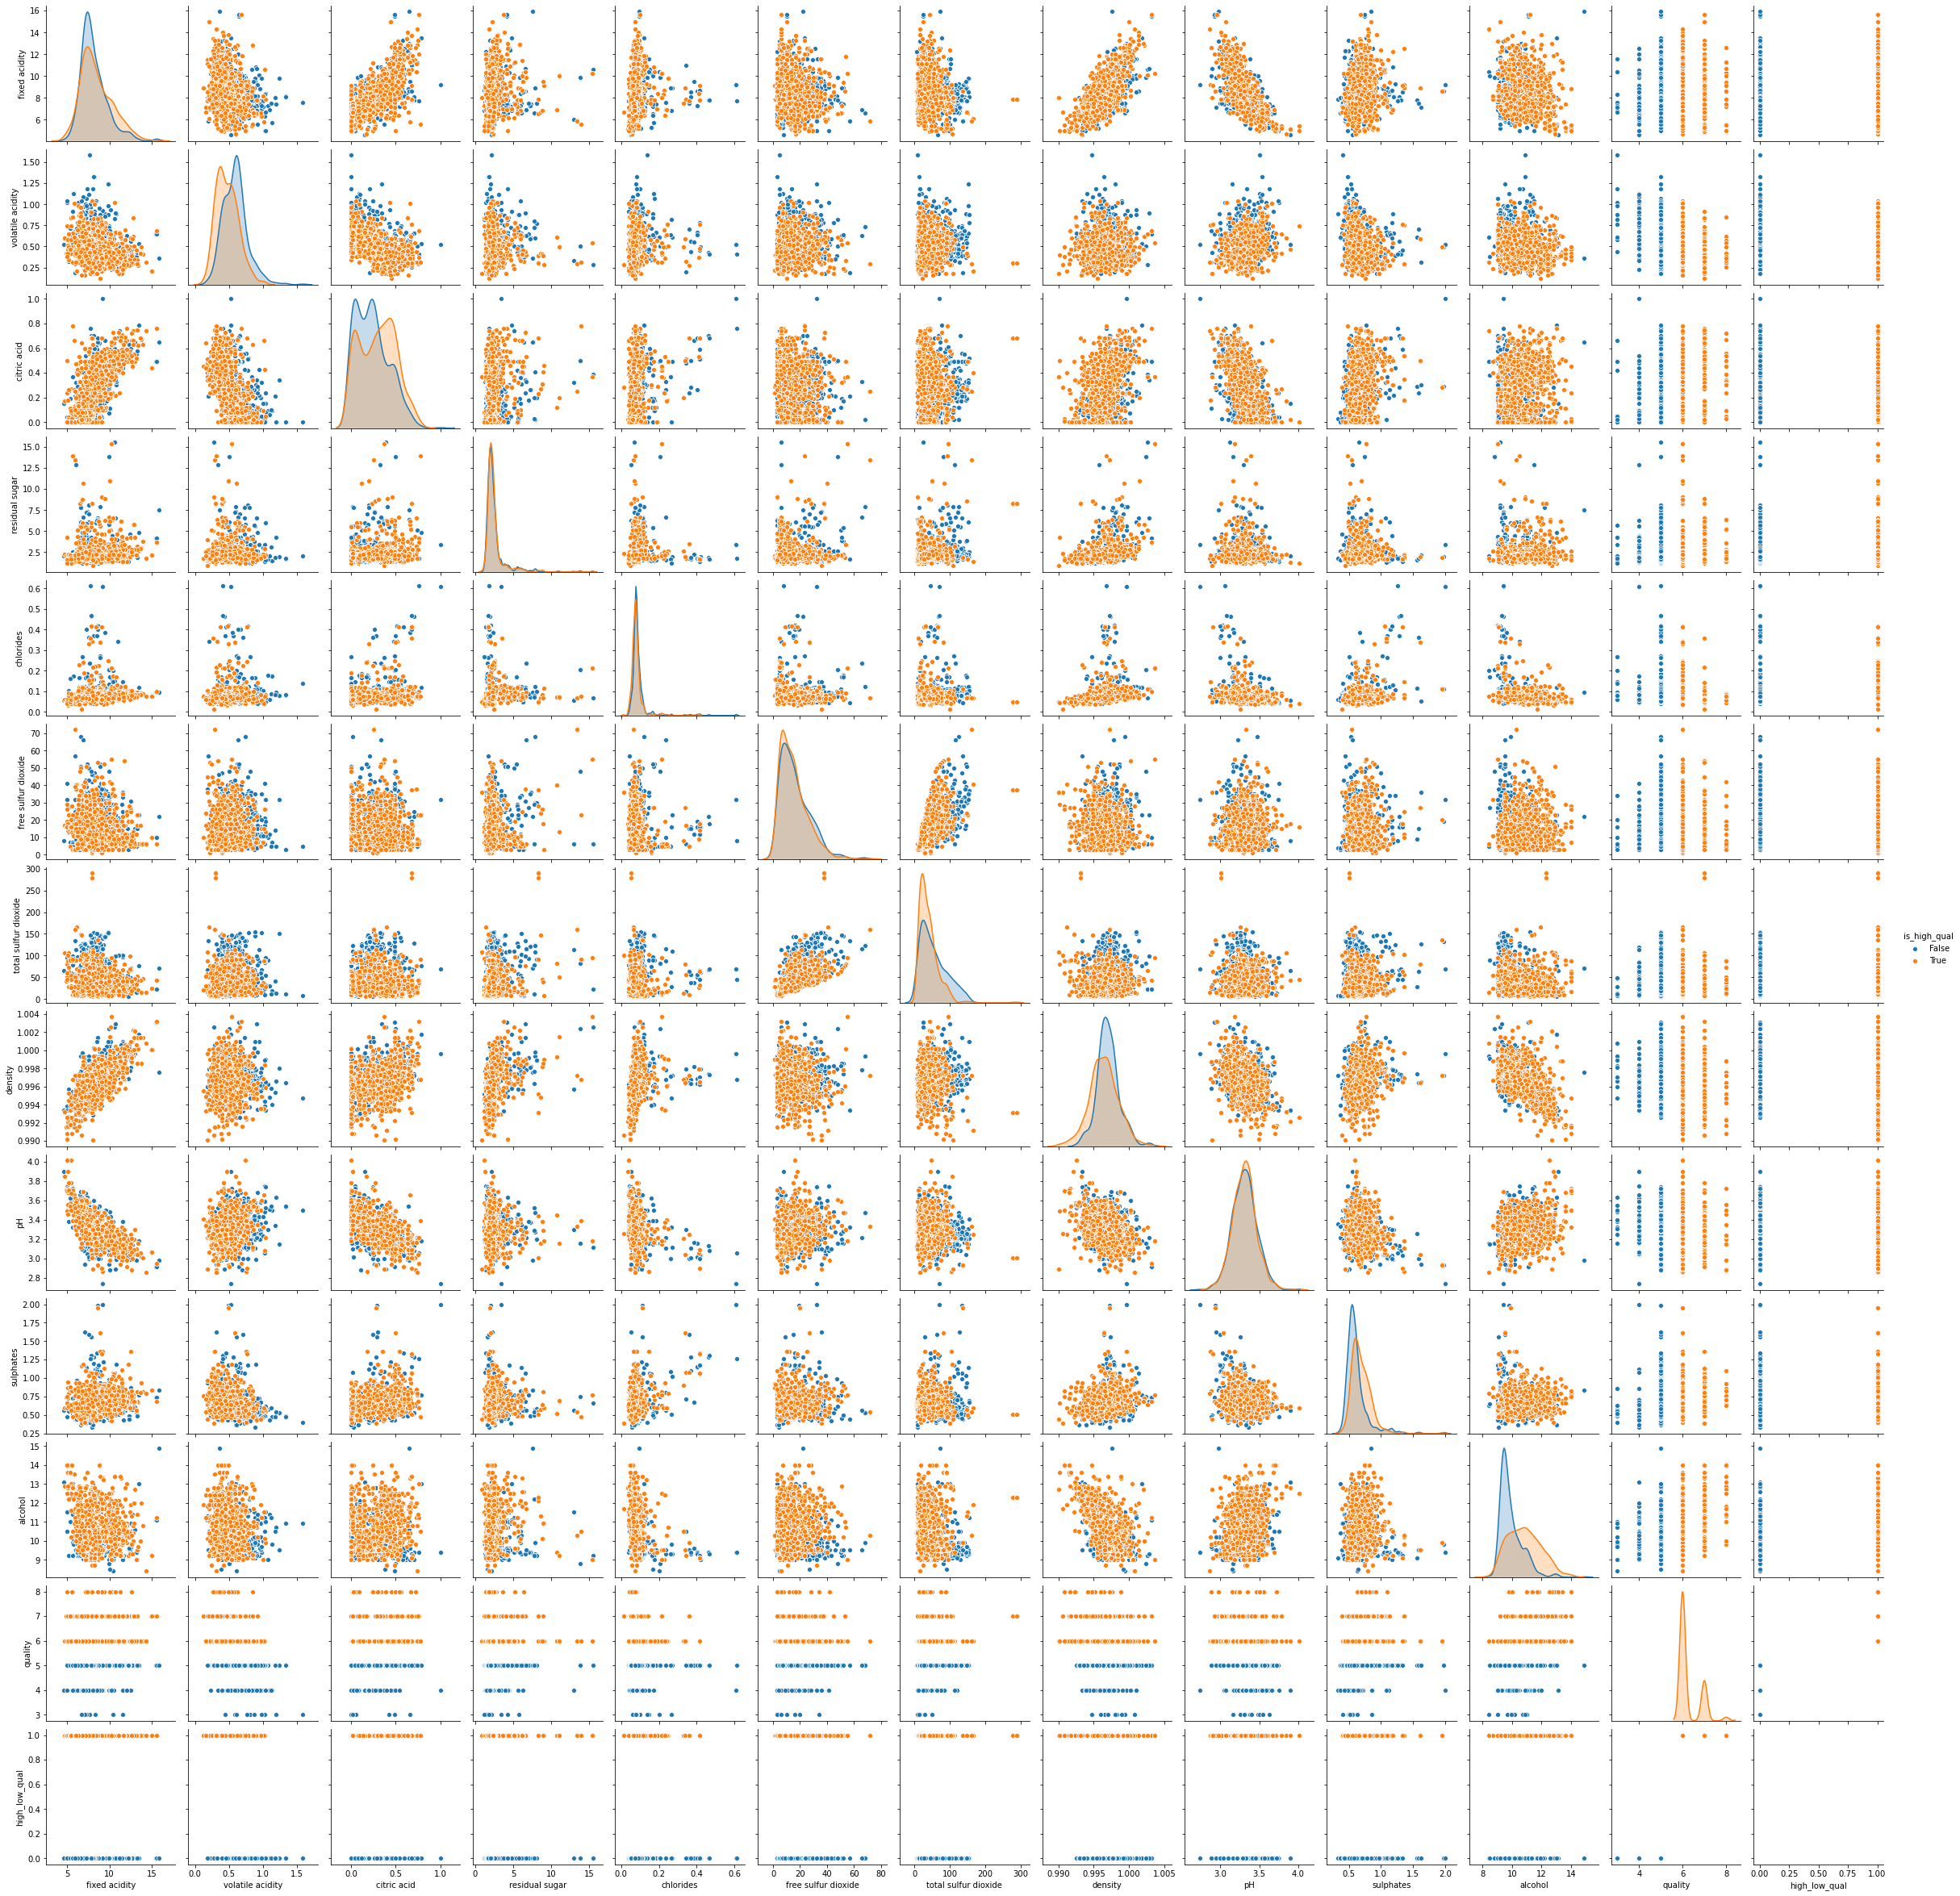

In [55]:
sns.pairplot(data_in, hue='is_high_qual');

Relationships:

* No clear relationships with high or low quality. Sad. Low quality maybe has less citrix acid, based on the density.

* Fixed acidity positively correlates with density and citric acid. 

* All the wines with high(er) volatile acidity are low-quality. 

* Low-quality wines are more centered in the density feature, and the definitely have less alcohol. 

* High-quality wines have lower total sulfur dioxide.

Not much else going on here. 

Engineered Features:

* **vol_fixed_ratio** is the ratio of volatile acids to fixed acids, $\frac{VA}{FA}$

* **prop_citric_acid** is the proportion of fixed acid that is citric acid, $\frac{CA}{FA}$

* **sugar_acidity_ratio** is the ratio of residual sugar to ph, $\frac{sugar}{ph}$, **sugar_acidity_interaction** is the residual sugar times the ph, $sugar\times ph$

* **chlor_acid_ratio** is the ratio of chlorides to ph, $\frac{chlor}{ph}$, **chlor_fixed_ratio** is the ratio of chlorides to fixed acidity, $\frac{chlor}{FA}$, **chlor_vol_ratio** is the ratio of chlorides to volatile acidity, $\frac{chlor}{VA}$

* **prop_free_sulfur** is the proportion of sulfur dioxide that is free, $\frac{FSO_2}{TSO_2}$

* **starting_density** is the density of the grape juice before fermentation, $SD = \frac{(Alc\times 7.362 + (density\times 1000)}{1000}$


In [74]:
data_out = pd.DataFrame({'quality':data_in['quality'], 'is_high_qual':data_in['is_high_qual']})
data_out['vol_fixed_ratio'] = data_in['volatile acidity'] / data_in['fixed acidity']
data_out['prop_citric_acid'] = data_in['citric acid'] / data_in['fixed acidity']
data_out['sugar_acidity_ratio'] = data_in['residual sugar'] / data_in['pH']
data_out['sugar_acidity_interaction'] = data_in['residual sugar'] * data_in['pH']
data_out['chlor_acid_ratio'] = data_in['chlorides'] / data_in['pH']
data_out['chlor_fixed_ratio'] = data_in['chlorides'] / data_in['fixed acidity']
data_out['chlor_vol_ratio'] = data_in['chlorides'] / data_in['volatile acidity']
data_out['prop_free_sulfur'] = data_in['free sulfur dioxide'] / data_in['total sulfur dioxide']

#And now for the hardest one
data_out['starting_density'] = (data_in['alcohol']*7.362 + data_in['density']*1000)/1000

In [75]:
data_out.head()

quality  is_high_qual  vol_fixed_ratio  prop_citric_acid  \
0        5         False         0.094595          0.000000   
1        5         False         0.112821          0.000000   
2        5         False         0.097436          0.005128   
3        6          True         0.025000          0.050000   
4        5         False         0.094595          0.000000   

   sugar_acidity_ratio  sugar_acidity_interaction  chlor_acid_ratio  \
0             0.541311                      6.669          0.021652   
1             0.812500                      8.320          0.030625   
2             0.705521                      7.498          0.028221   
3             0.601266                      6.004          0.023734   
4             0.541311                      6.669          0.021652   

   chlor_fixed_ratio  chlor_vol_ratio  prop_free_sulfur  starting_density  
0           0.010270         0.108571          0.323529          1.067003  
1           0.012564         0.111364          0.373134          1.068948  
2           0.011795         0.121053          0.277778          1.069148  
3           0.006696         0.267857          0.283333          1.070148  
4           0.010270         0.108571          0.323529          1.067003

/Users/johnrizcallah/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


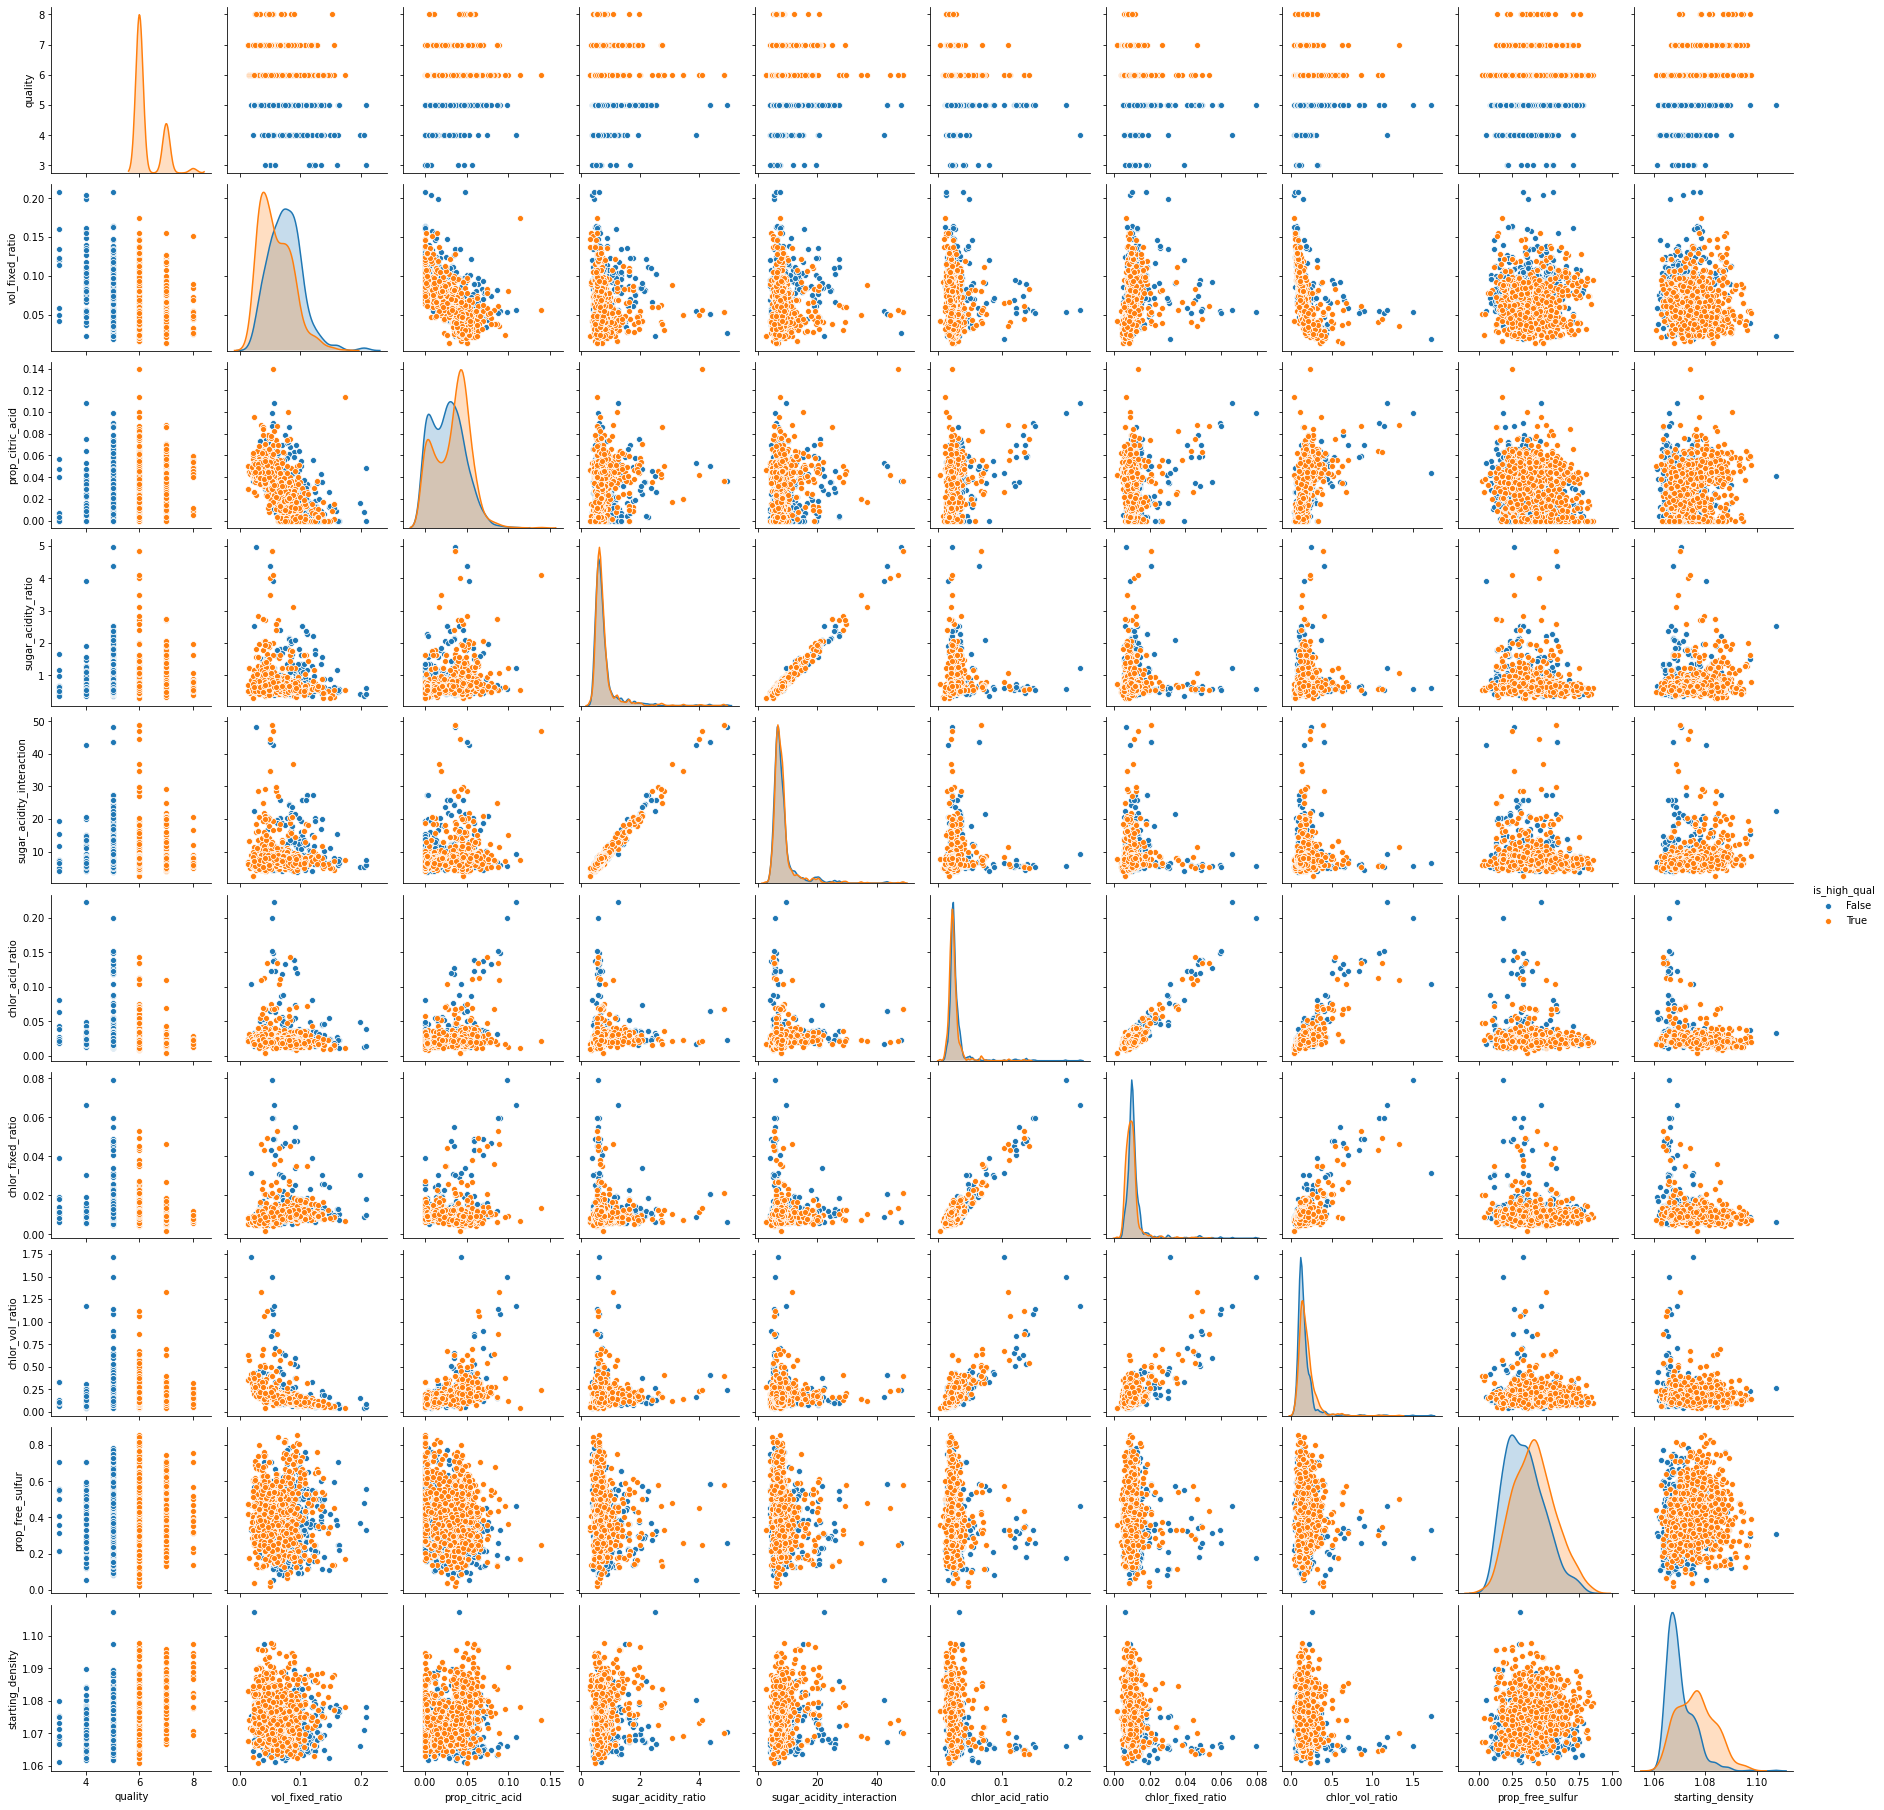

In [76]:
# Now to look at the pairplot of the new engineered features
sns.pairplot(data_out, hue='is_high_qual');

What I see in these plots:

* Potential non-linear relationship between quality and: 
 - prop_citric_acid
 - sugar_acidity_ratio
 - sugar_acidity_interaction
 - chlor_fixed_ratio

* low-quality wines have lower starting_density

* low-quality wines have LOWER (surprise!) prop_free_sulfur

* low_quality wines have higher vol_fixed_ratio

I am going to try squaring the features and see what that does.

In [85]:
data_out_sq = data_out.drop('quality', axis=1) ** 2
data_out_sq['quality'] = data_out['quality']

/Users/johnrizcallah/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


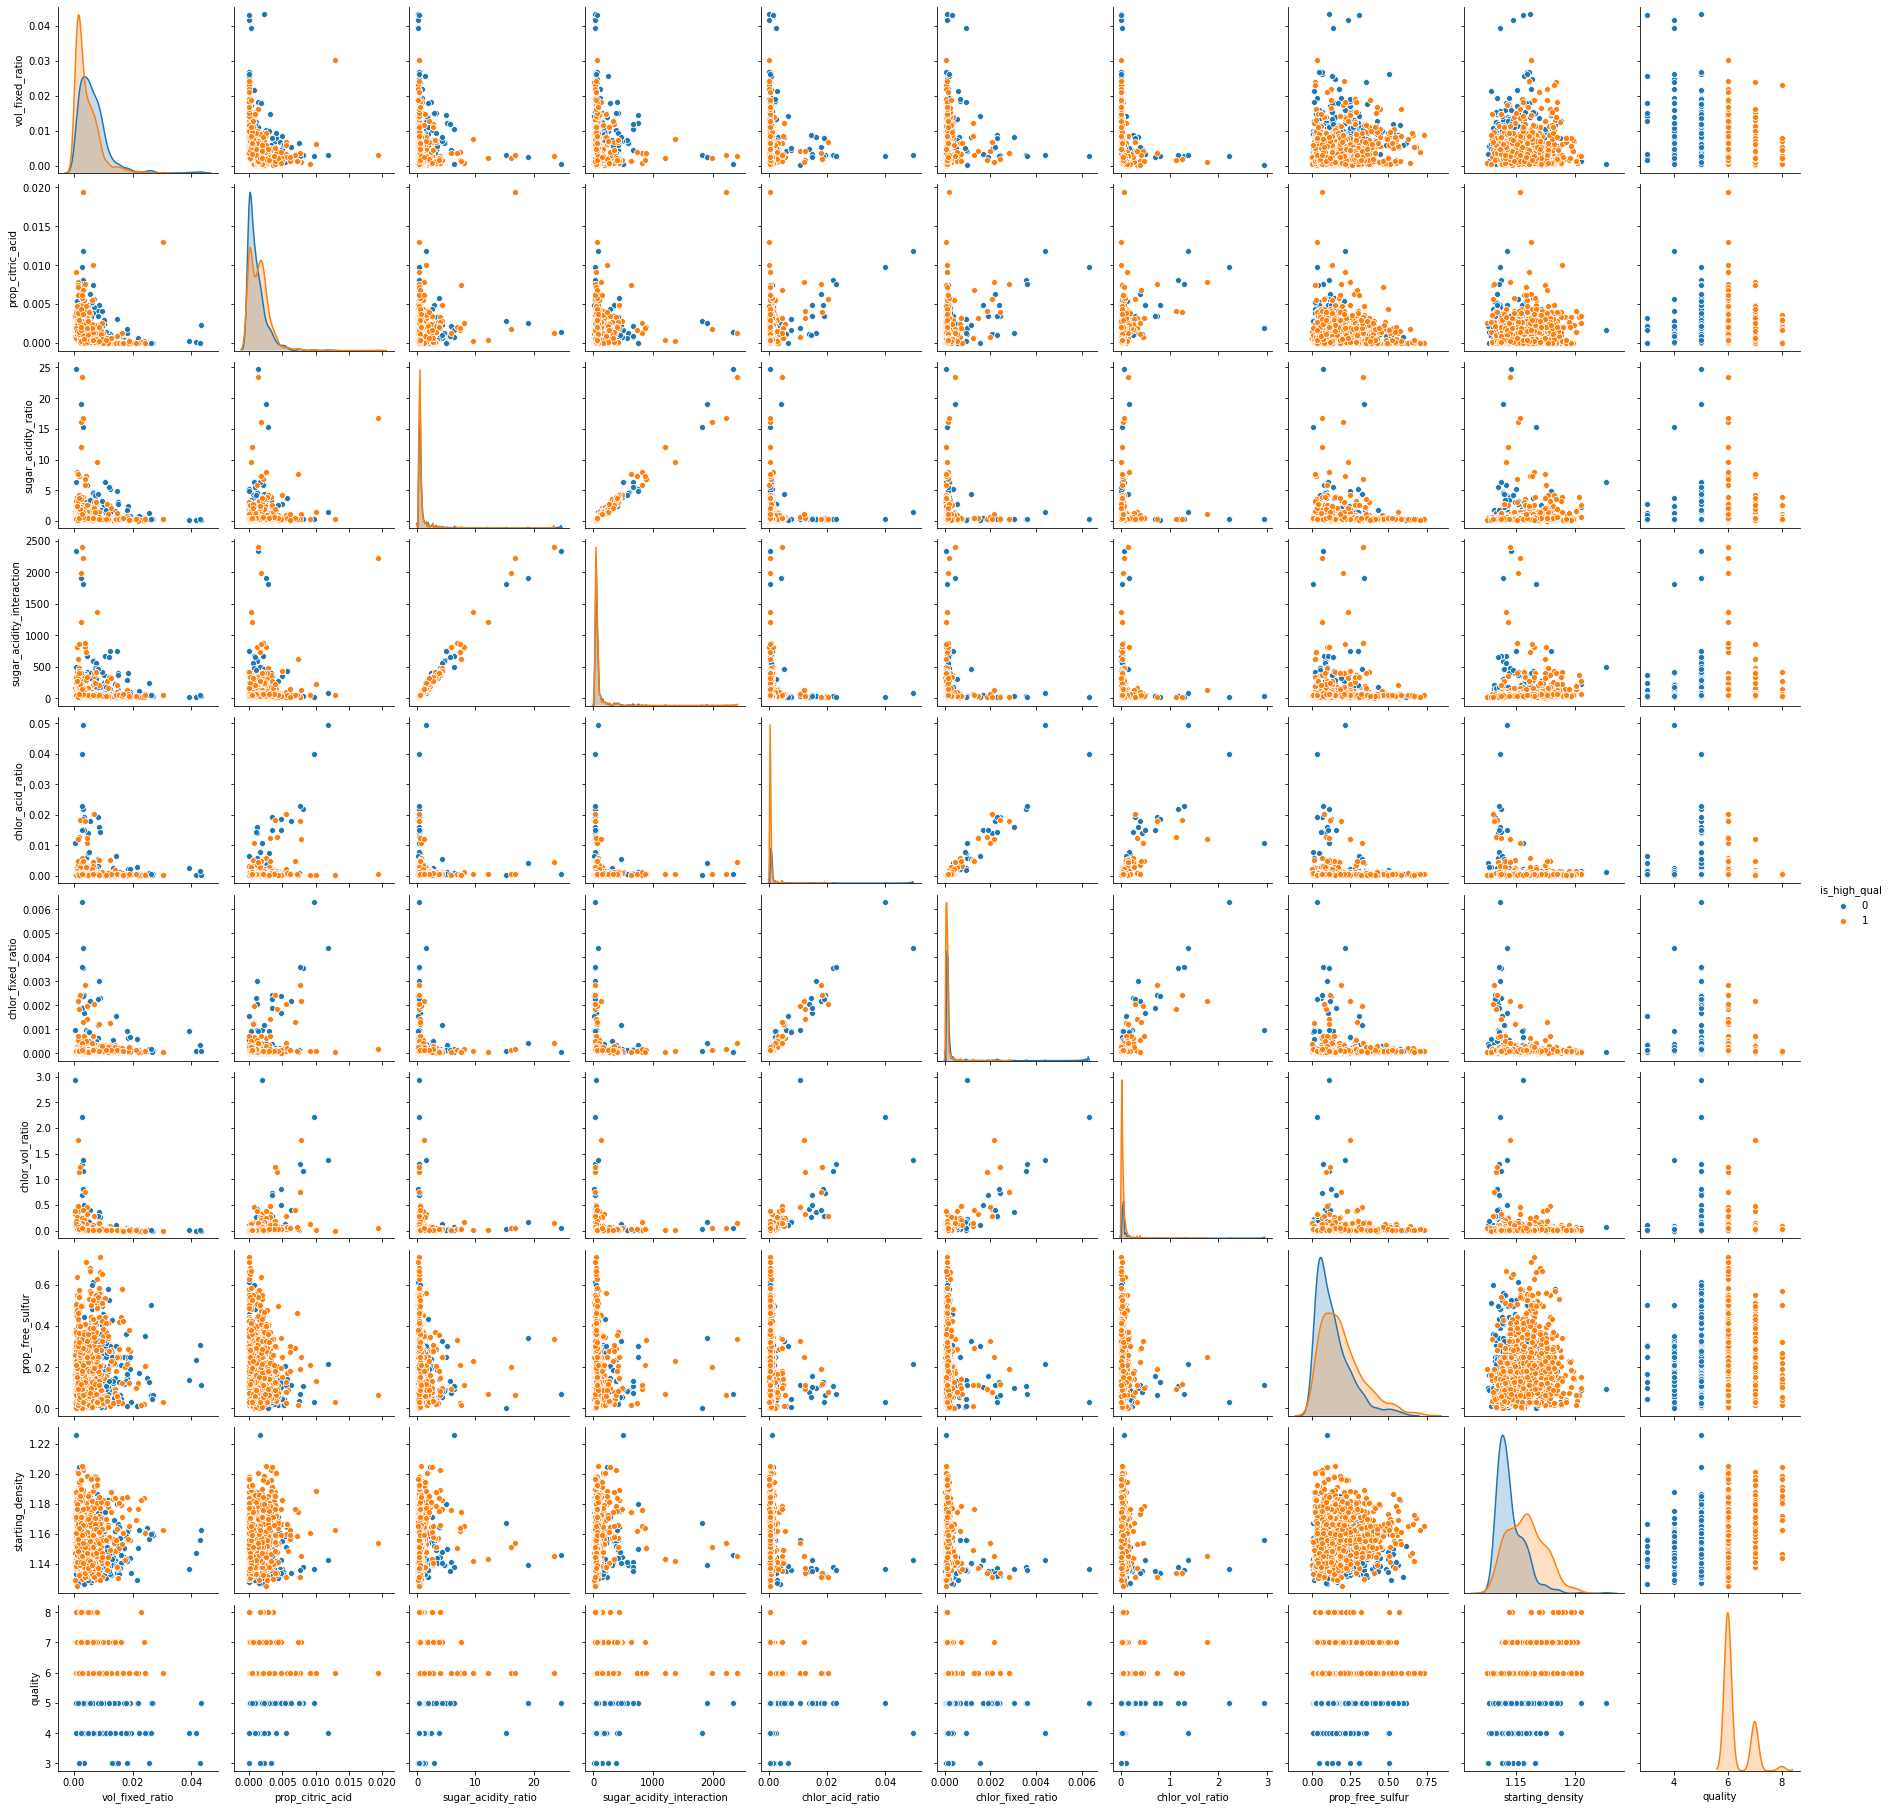

In [87]:
sns.pairplot(data_out_sq, hue='is_high_qual');

What I see in these plots:

* Nothing that looks especially helpful.

Now I am going to try scaling the features and plotting again.

In [93]:
# Put all the features together real quick
for feature in data_in.columns:
    data_out[feature] = data_in[feature]
    
data_out.head()

quality  is_high_qual  vol_fixed_ratio  prop_citric_acid  \
0        5         False         0.094595          0.000000   
1        5         False         0.112821          0.000000   
2        5         False         0.097436          0.005128   
3        6          True         0.025000          0.050000   
4        5         False         0.094595          0.000000   

   sugar_acidity_ratio  sugar_acidity_interaction  chlor_acid_ratio  \
0             0.541311                      6.669          0.021652   
1             0.812500                      8.320          0.030625   
2             0.705521                      7.498          0.028221   
3             0.601266                      6.004          0.023734   
4             0.541311                      6.669          0.021652   

   chlor_fixed_ratio  chlor_vol_ratio  prop_free_sulfur  ...  citric acid  \
0           0.010270         0.108571          0.323529  ...         0.00   
1           0.012564         0.111364          0.373134  ...         0.00   
2           0.011795         0.121053          0.277778  ...         0.04   
3           0.006696         0.267857          0.283333  ...         0.56   
4           0.010270         0.108571          0.323529  ...         0.00   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             1.9      0.076                 11.0                  34.0   
1             2.6      0.098                 25.0                  67.0   
2             2.3      0.092                 15.0                  54.0   
3             1.9      0.075                 17.0                  60.0   
4             1.9      0.076                 11.0                  34.0   

   density    pH  sulphates  alcohol  high_low_qual  
0   0.9978  3.51       0.56      9.4          False  
1   0.9968  3.20       0.68      9.8          False  
2   0.9970  3.26       0.65      9.8          False  
3   0.9980  3.16       0.58      9.8           True  
4   0.9978  3.51       0.56      9.4          False  

[5 rows x 23 columns]

In [114]:
# Now scale it and see what happens
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_out.drop(['quality', 'is_high_qual'], axis=1))


/Users/johnrizcallah/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/johnrizcallah/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/johnrizcallah/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


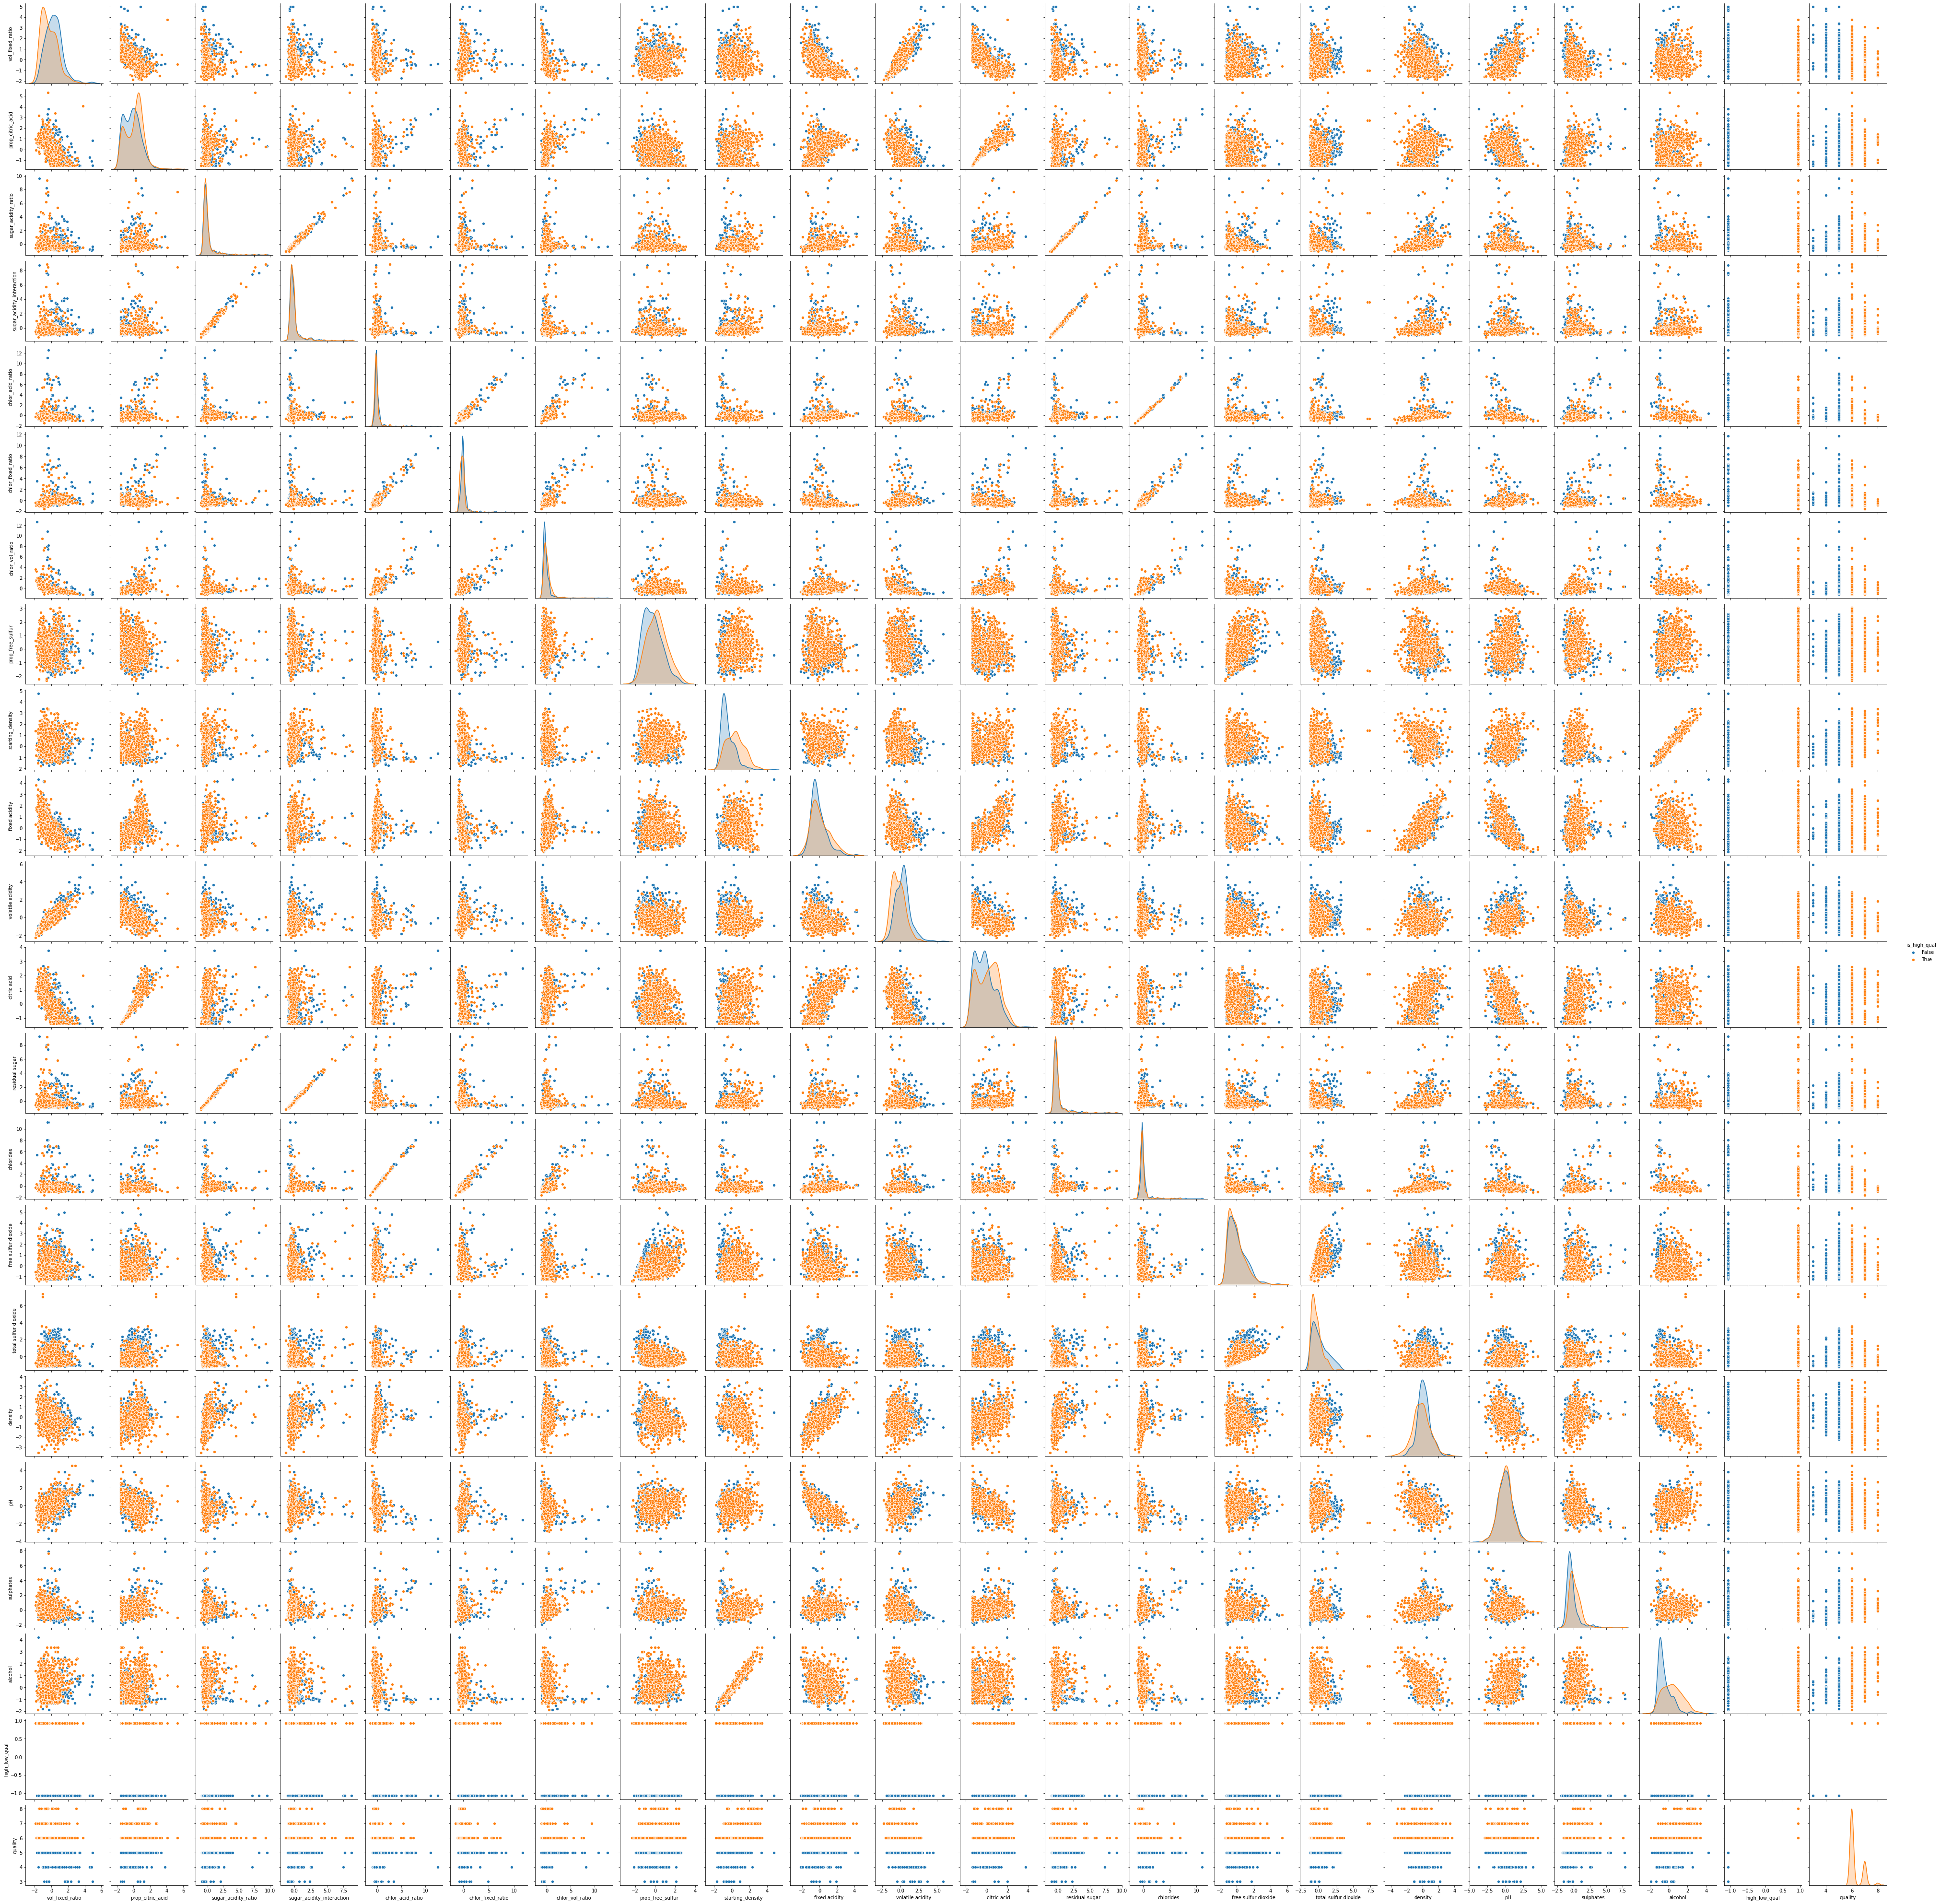

In [106]:
dataframe_scaled = pd.DataFrame(data_scaled, columns=data_out.drop(['quality', 'is_high_qual'], axis=1).columns)
dataframe_scaled[['quality', 'is_high_qual']] = data_out[['quality', 'is_high_qual']]
sns.pairplot(dataframe_scaled, hue='is_high_qual')

Notes here:

* There are too many features. Don't try to do a pairplot on more than 20 features at a time. 

* Not much else that hasn't already been discussed. 

Let's just try a linear regression with these engineered features and see what happens.

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled, data_out['quality'], test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)

model.

0.7399115514741337

In [177]:
pred = model.predict(X_test)
error = y_test - pred 
mse = np.mean(error**2)
rmse = np.sqrt(mse)
print("Model RMSE is: ", rmse)

Model RMSE is:  0.37164009186345753


In [173]:
pred_rounded = pred.round()
class_acc = ((pred_rouned - y_test) == 0).mean()

In [178]:
print("Classification accuracy is: ", class_acc)

Classification accuracy is:  0.815625


In [176]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_rounded, y_test)

0.815625